Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_dataset = pd.read_csv('finaldataset.csv')
final_dataset.head(5)

,Unnamed: 0,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Autumn,Spring,Summer,Winter,coastal,inland,mountain,Weather Type Enc
0,0,14.0,73.0,9.5,82.0,1,1010.82,2,3.5,False,False,False,True,False,True,False,1
1,1,39.0,96.0,8.5,71.0,1,1011.43,7,10.0,False,True,False,False,False,True,False,0
2,2,30.0,64.0,7.0,16.0,0,1018.72,5,5.5,False,True,False,False,False,False,True,3
3,3,38.0,83.0,1.5,82.0,0,1026.25,7,1.0,False,True,False,False,True,False,False,3
4,4,27.0,74.0,17.0,66.0,3,990.67,1,2.5,False,False,False,True,False,False,True,1


In [3]:
data = final_dataset[['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Visibility (km)','Autumn','Spring','Summer','Winter','coastal','inland','mountain']]
target = final_dataset[['Weather Type Enc']] 


Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state=0, stratify = target)

In [6]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (9197, 15)
y_train shape: (9197, 1)


In [7]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (3942, 15)
y_test shape: (3942, 1)


Text(0, 0.5, 'no of weathers')

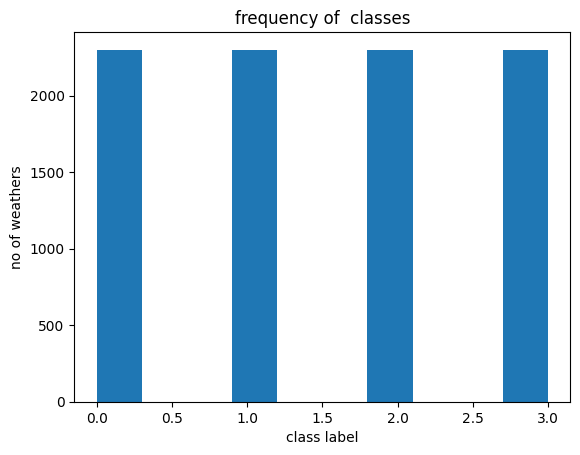

In [8]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of weathers')

Feature Scaling using minmax scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

Training KNN model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Without scaling
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

c:\Users\Salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test set accuracy: 0.89


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn=KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy1 = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy1))



c:\Users\Salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test set accuracy: 0.89


In [14]:
#Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)

Confusion Matrix: 
 [[863  77  21  25]
 [ 69 857  45  15]
 [ 36  16 909  24]
 [ 71  42   7 865]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       986
           1       0.86      0.87      0.87       986
           2       0.93      0.92      0.92       985
           3       0.93      0.88      0.90       985

    accuracy                           0.89      3942
   macro avg       0.89      0.89      0.89      3942
weighted avg       0.89      0.89      0.89      3942



Predicting weather type using Decision Tree

In [15]:
from sklearn import tree

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

[Text(0.36705731099688244, 0.9772727272727273, 'x[0] <= 0.235\ngini = 0.75\nsamples = 9197\nvalue = [2301, 2301, 2298, 2297]'),
 Text(0.17277037559382422, 0.9318181818181818, 'x[11] <= 0.5\ngini = 0.192\nsamples = 2395\nvalue = [89, 85, 2148, 73]'),
 Text(0.26991384329535334, 0.9545454545454546, 'True  '),
 Text(0.10141961104513064, 0.8863636363636364, 'x[3] <= 0.298\ngini = 0.748\nsamples = 236\nvalue = [62.0, 64.0, 52.0, 58.0]'),
 Text(0.03705463182897862, 0.8409090909090909, 'x[7] <= 0.662\ngini = 0.704\nsamples = 62\nvalue = [22, 7, 22, 11]'),
 Text(0.015676959619952493, 0.7954545454545454, 'x[0] <= 0.131\ngini = 0.668\nsamples = 31\nvalue = [15, 3, 6, 7]'),
 Text(0.007600950118764846, 0.75, 'x[5] <= 0.179\ngini = 0.704\nsamples = 14\nvalue = [4, 1, 5, 4]'),
 Text(0.003800475059382423, 0.7045454545454546, 'x[0] <= 0.075\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 0, 3]'),
 Text(0.0019002375296912114, 0.6590909090909091, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]'),
 Text(0.00570

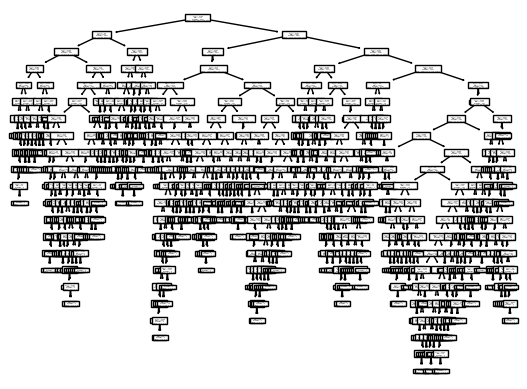

In [17]:
tree.plot_tree(clf)

In [18]:
y_pred = clf.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy2))

Test set accuracy: 0.91


In [19]:
#Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)

Confusion Matrix: 
 [[881  50  22  33]
 [ 47 896  25  18]
 [ 19  32 920  14]
 [ 35  34  27 889]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       986
           1       0.89      0.91      0.90       986
           2       0.93      0.93      0.93       985
           3       0.93      0.90      0.92       985

    accuracy                           0.91      3942
   macro avg       0.91      0.91      0.91      3942
weighted avg       0.91      0.91      0.91      3942



Training Naive Bayes model

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gnb = GaussianNB()
y_pred = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)
accuracy3 = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy3))

Test set accuracy: 0.83


c:\Users\Salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)

Confusion Matrix: 
 [[728 113  81  64]
 [ 60 763 133  30]
 [ 31  11 907  36]
 [ 43  47  17 878]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       986
           1       0.82      0.77      0.79       986
           2       0.80      0.92      0.85       985
           3       0.87      0.89      0.88       985

    accuracy                           0.83      3942
   macro avg       0.83      0.83      0.83      3942
weighted avg       0.83      0.83      0.83      3942



Comparing accuracies of the models using bar chart

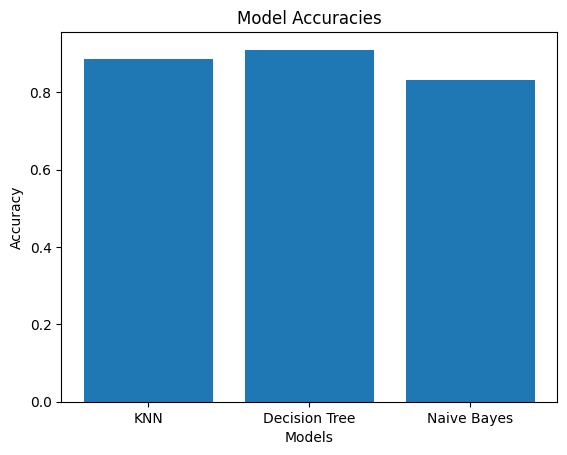

In [22]:
models = ['KNN', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.bar(models, accuracies)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()